In [1]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


data = pd.read_csv('CPUTimes_inputdata.csv')
data

,CPUTime,prefix,type
0,44863,site/,JAVA
1,806,src/test,JAVA
2,576,src/main,JAVA
3,1807,tools/,JAVA
4,2440,src/main,JAVA
...,...,...,...
495,11084,src/test,JAVA
496,626,src/main,C/C++
497,1270,site/,C/C++
498,876,site/,C/C++


In [2]:
data['prefix'].value_counts()

src/main        186
tools/          171
src/test         62
site/            60
bazelci/          9
third_party/      6
src/tools         3
scripts/          3
Name: prefix, dtype: int64

In [3]:
data['CPUTime'].value_counts()

602     5
593     4
594     4
612     3
630     3
       ..
1589    1
3455    1
3535    1
4125    1
876     1
Name: CPUTime, Length: 444, dtype: int64

In [4]:
data['type'].value_counts()

JAVA        427
C/C++        35
Starlark     35
python        3
Name: type, dtype: int64

In [5]:
type(data)

pandas.core.frame.DataFrame

In [6]:
dummies=pd.get_dummies(data.prefix)
dummies

,bazelci/,scripts/,site/,src/main,src/test,src/tools,third_party/,tools/
0,0,0,1,0,0,0,0,0
1,0,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,1
4,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...
495,0,0,0,0,1,0,0,0
496,0,0,0,1,0,0,0,0
497,0,0,1,0,0,0,0,0
498,0,0,1,0,0,0,0,0


In [7]:
merge = pd.concat([data,dummies], axis='columns')
merge

,CPUTime,prefix,type,bazelci/,scripts/,site/,src/main,src/test,src/tools,third_party/,tools/
0,44863,site/,JAVA,0,0,1,0,0,0,0,0
1,806,src/test,JAVA,0,0,0,0,1,0,0,0
2,576,src/main,JAVA,0,0,0,1,0,0,0,0
3,1807,tools/,JAVA,0,0,0,0,0,0,0,1
4,2440,src/main,JAVA,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
495,11084,src/test,JAVA,0,0,0,0,1,0,0,0
496,626,src/main,C/C++,0,0,0,1,0,0,0,0
497,1270,site/,C/C++,0,0,1,0,0,0,0,0
498,876,site/,C/C++,0,0,1,0,0,0,0,0


In [9]:
dummies_t=pd.get_dummies(merge.type)
dummies_t

,C/C++,JAVA,Starlark,python
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
495,0,1,0,0
496,1,0,0,0
497,1,0,0,0
498,1,0,0,0


In [10]:
merge_f=pd.concat([merge,dummies_t],axis='columns')
merge_f

,CPUTime,prefix,type,bazelci/,scripts/,site/,src/main,src/test,src/tools,third_party/,tools/,C/C++,JAVA,Starlark,python
0,44863,site/,JAVA,0,0,1,0,0,0,0,0,0,1,0,0
1,806,src/test,JAVA,0,0,0,0,1,0,0,0,0,1,0,0
2,576,src/main,JAVA,0,0,0,1,0,0,0,0,0,1,0,0
3,1807,tools/,JAVA,0,0,0,0,0,0,0,1,0,1,0,0
4,2440,src/main,JAVA,0,0,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,11084,src/test,JAVA,0,0,0,0,1,0,0,0,0,1,0,0
496,626,src/main,C/C++,0,0,0,1,0,0,0,0,1,0,0,0
497,1270,site/,C/C++,0,0,1,0,0,0,0,0,1,0,0,0
498,876,site/,C/C++,0,0,1,0,0,0,0,0,1,0,0,0


In [11]:
final=merge_f.drop(['prefix','type','python','third_party/'],axis='columns')
final

,CPUTime,bazelci/,scripts/,site/,src/main,src/test,src/tools,tools/,C/C++,JAVA,Starlark
0,44863,0,0,1,0,0,0,0,0,1,0
1,806,0,0,0,0,1,0,0,0,1,0
2,576,0,0,0,1,0,0,0,0,1,0
3,1807,0,0,0,0,0,0,1,0,1,0
4,2440,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
495,11084,0,0,0,0,1,0,0,0,1,0
496,626,0,0,0,1,0,0,0,1,0,0
497,1270,0,0,1,0,0,0,0,1,0,0
498,876,0,0,1,0,0,0,0,1,0,0


In [12]:
title=list(final.columns)
title

title[0],title[7]=title[7],title[0]
title

title[7],title[10]=title[10],title[7]
title


['tools/',
 'bazelci/',
 'scripts/',
 'site/',
 'src/main',
 'src/test',
 'src/tools',
 'Starlark',
 'C/C++',
 'JAVA',
 'CPUTime']

In [13]:
final=final[title]
final

,tools/,bazelci/,scripts/,site/,src/main,src/test,src/tools,Starlark,C/C++,JAVA,CPUTime
0,0,0,0,1,0,0,0,0,0,1,44863
1,0,0,0,0,0,1,0,0,0,1,806
2,0,0,0,0,1,0,0,0,0,1,576
3,1,0,0,0,0,0,0,0,0,1,1807
4,0,0,0,0,1,0,0,0,0,1,2440
...,...,...,...,...,...,...,...,...,...,...,...
495,0,0,0,0,0,1,0,0,0,1,11084
496,0,0,0,0,1,0,0,0,1,0,626
497,0,0,0,1,0,0,0,0,1,0,1270
498,0,0,0,1,0,0,0,0,1,0,876


In [14]:
y = final['CPUTime']
x = final.drop(['CPUTime'],axis = 1)

print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

print("The shape of x train:", x_train.shape)
print("The shape of x test:", x_test.shape)
print("The shape of y train:", y_train.shape)
print("The shape of y test:", y_test.shape)


Shape of x: (500, 10)
Shape of y: (500,)
The shape of x train: (400, 10)
The shape of x test: (100, 10)
The shape of y train: (400,)
The shape of y test: (100,)


In [15]:

model = LogisticRegression(solver='liblinear')
model.fit(x_train.values, y_train.values)
y_pred = model.predict(x_test.values)



In [16]:
y_pred

array([ 593,  594,  593,  593,  593,  594,  593,  593,  593,  593,  593,
        594,  594,  594,  594,  593,  594,  609,  594,  594,  594,  594,
        593,  594,  593,  594, 4021,  594,  594,  593,  594,  594,  593,
        594,  594,  593,  594, 4021,  594,  593,  594,  593,  594,  594,
       4021,  594,  594,  593,  594, 1383,  593,  593,  594,  594,  593,
        594,  593,  593,  609,  593,  609,  594,  594,  594,  593,  609,
        594,  594, 3455,  593,  609,  594,  593,  594,  593,  593,  594,
        594,  593,  593,  594,  594,  594,  593,  594,  593,  594,  594,
        593, 1636,  594, 4021,  593,  593,  609,  593,  593,  593,  594,
        593], dtype=int64)

In [17]:
model.score(x_train.values,y_train.values)

0.0525

In [18]:
from sklearn.metrics import mean_squared_error

In [19]:
final.corr()

,tools/,bazelci/,scripts/,site/,src/main,src/test,src/tools,Starlark,C/C++,JAVA,CPUTime
tools/,1.000000,-0.097607,-0.056012,-0.266225,-0.554871,-0.271243,-0.056012,-0.082124,-0.164744,0.166752,-0.089105
bazelci/,-0.097607,1.000000,-0.010519,-0.049995,-0.104201,-0.050938,-0.010519,0.375567,-0.037144,-0.242236,-0.022228
scripts/,-0.056012,-0.010519,1.000000,-0.028690,-0.059796,-0.029231,-0.006036,0.181687,-0.021315,-0.114561,0.012732
site/,-0.266225,-0.049995,-0.028690,1.000000,-0.284211,-0.138934,-0.028690,-0.101311,0.381123,-0.195911,0.063682
src/main,-0.554871,-0.104201,-0.059796,-0.284211,1.000000,-0.289568,-0.059796,-0.162501,-0.113848,0.212762,0.037725
src/test,-0.271243,-0.050938,-0.029231,-0.138934,-0.289568,1.000000,-0.029231,0.205966,-0.079437,-0.102219,0.028863
src/tools,-0.056012,-0.010519,-0.006036,-0.028690,-0.059796,-0.029231,1.000000,-0.021315,0.283188,-0.187904,-0.013966
Starlark,-0.082124,0.375567,0.181687,-0.101311,-0.162501,0.205966,-0.021315,1.000000,-0.075269,-0.663529,-0.032471
C/C++,-0.164744,-0.037144,-0.021315,0.381123,-0.113848,-0.079437,0.283188,-0.075269,1.000000,-0.663529,-0.026695
JAVA,0.166752,-0.242236,-0.114561,-0.195911,0.212762,-0.102219,-0.187904,-0.663529,-0.663529,1.000000,0.048403


In [20]:
prediction = model.predict((np.array([[0,0,1,0,0,0,0,0,0,1]])))
print("The suggested CPUTime is :", prediction)

The suggested CPUTime is : [1209]


In [21]:
prediction = model.predict((np.array([[0,0,0,0,0,1,0,0,0,1]])))
print("The suggested CPUTime is :", prediction)

The suggested CPUTime is : [594]


In [22]:
prediction = model.predict((np.array([[0,0,0,1,0,0,0,1,0,0]])))
print("The suggested CPUTime is :", prediction)

The suggested CPUTime is : [609]


In [23]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

         570       0.00      0.00      0.00       1.0
         580       0.00      0.00      0.00       1.0
         584       0.00      0.00      0.00       1.0
         585       0.00      0.00      0.00       1.0
         589       0.00      0.00      0.00       1.0
         590       0.00      0.00      0.00       1.0
         593       0.00      0.00      0.00       0.0
         594       0.00      0.00      0.00       0.0
         596       0.00      0.00      0.00       1.0
         598       0.00      0.00      0.00       1.0
         602       0.00      0.00      0.00       2.0
         606       0.00      0.00      0.00       1.0
         609       0.00      0.00      0.00       0.0
         612       0.00      0.00      0.00       1.0
         615       0.00      0.00      0.00       1.0
         629       0.00      0.00      0.00       1.0
         630       0.00      0.00      0.00       1.0
         634       0.00    

C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

<AxesSubplot:xlabel='Starlark', ylabel='CPUTime'>

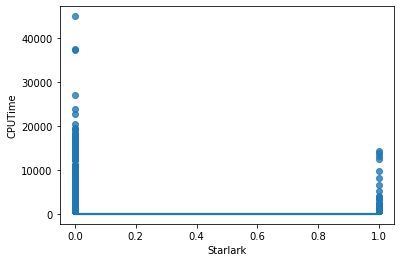

In [24]:
import seaborn as sns
t = final['Starlark']
sns.regplot(x=t, y=y, data=final, logistic=True, ci=None)

<AxesSubplot:xlabel='JAVA', ylabel='CPUTime'>

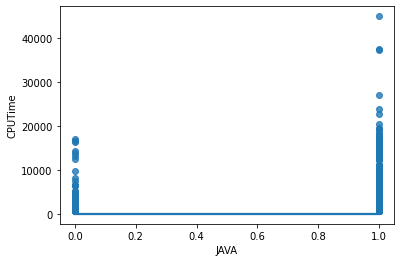

In [25]:
import seaborn as sns
t = final['JAVA']
sns.regplot(x=t, y=y, data=final, logistic=True, ci=None)

<AxesSubplot:xlabel='C/C++', ylabel='CPUTime'>

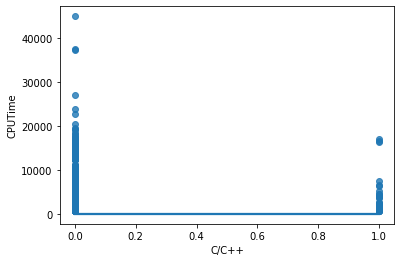

In [26]:
import seaborn as sns
t = final['C/C++']
sns.regplot(x=t, y=y, data=final, logistic=True, ci=None)

<AxesSubplot:xlabel='tools/', ylabel='CPUTime'>

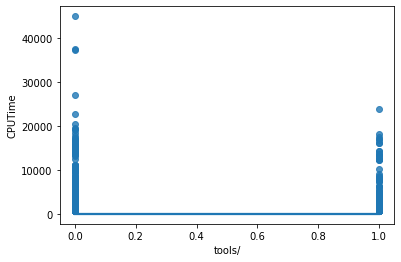

In [27]:
import seaborn as sns
t = final['tools/']
sns.regplot(x=t, y=y, data=final, logistic=True, ci=None)

<AxesSubplot:xlabel='bazelci/', ylabel='CPUTime'>

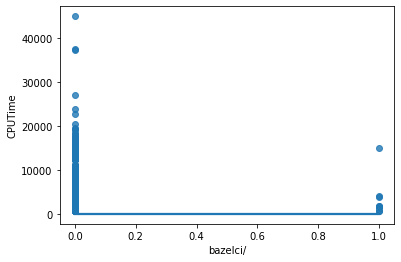

In [28]:
import seaborn as sns
t = final['bazelci/']
sns.regplot(x=t, y=y, data=final, logistic=True, ci=None)

<AxesSubplot:xlabel='scripts/', ylabel='CPUTime'>

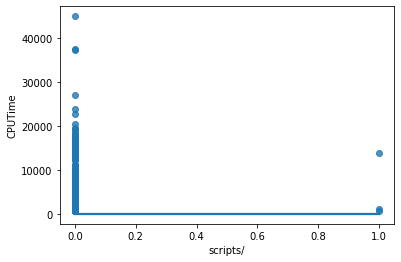

In [29]:
import seaborn as sns
t = final['scripts/']
sns.regplot(x=t, y=y, data=final, logistic=True, ci=None)

<AxesSubplot:xlabel='site/', ylabel='CPUTime'>

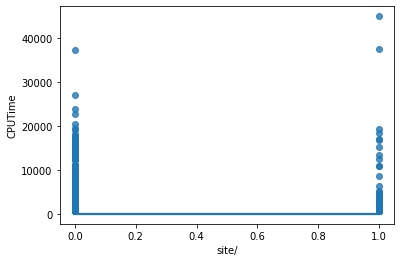

In [30]:
import seaborn as sns
t = final['site/']
sns.regplot(x=t, y=y, data=final, logistic=True, ci=None)

<AxesSubplot:xlabel='src/main', ylabel='CPUTime'>

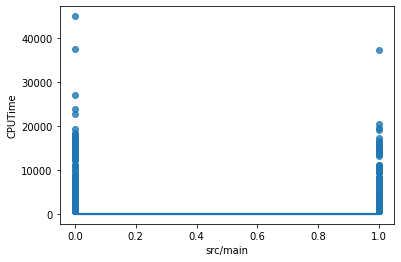

In [31]:
import seaborn as sns
t = final['src/main']
sns.regplot(x=t, y=y, data=final, logistic=True, ci=None)

<AxesSubplot:xlabel='src/test', ylabel='CPUTime'>

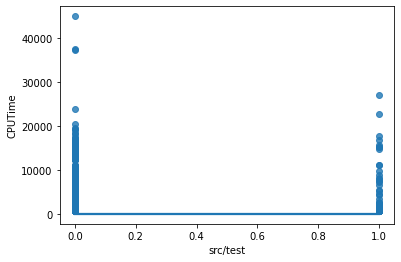

In [32]:
import seaborn as sns
t = final['src/test']
sns.regplot(x=t, y=y, data=final, logistic=True, ci=None)

<AxesSubplot:xlabel='src/tools', ylabel='CPUTime'>

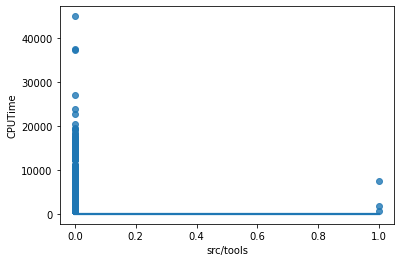

In [33]:
import seaborn as sns
t = final['src/tools']
sns.regplot(x=t, y=y, data=final, logistic=True, ci=None)

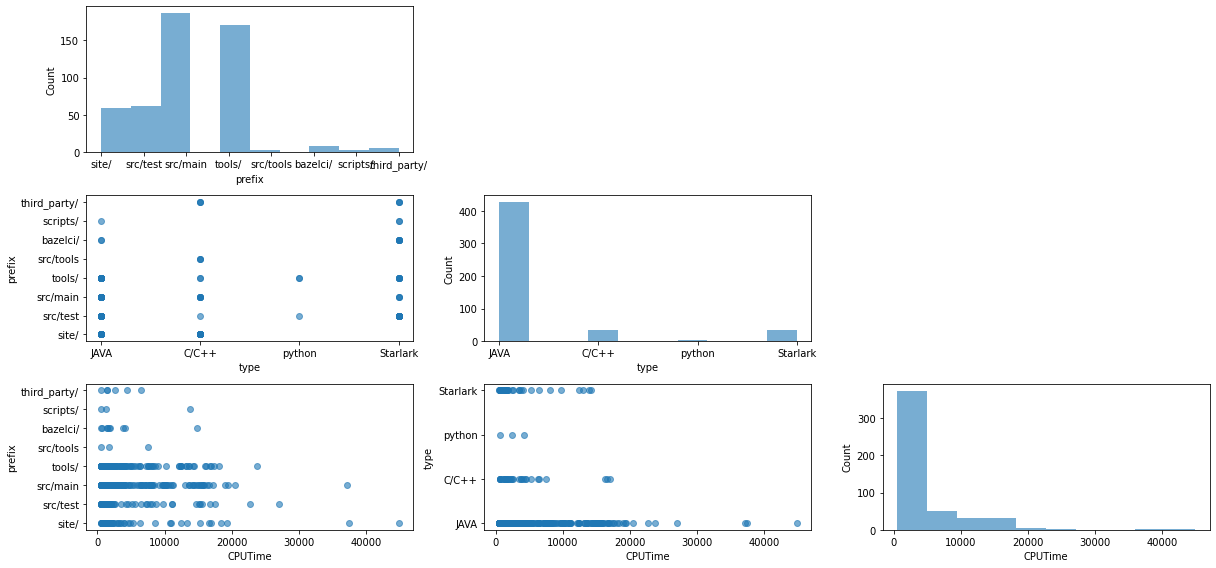

In [43]:
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix
df = pd.read_csv('CPUTimes_inputdata.csv')
cols = ['prefix','type','CPUTime']
scatterplotmatrix(df[cols].values, figsize =(17,8) , names = cols , alpha =0.6)
plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

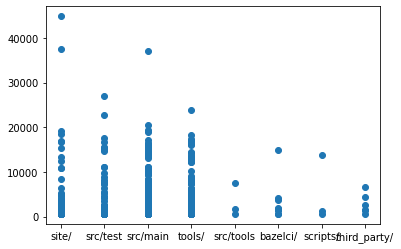

In [36]:
plt.scatter(data["prefix"], data["CPUTime"])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

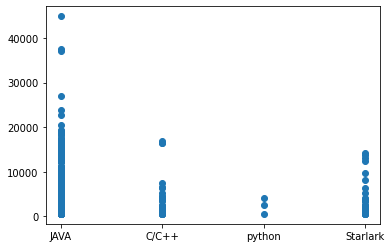

In [38]:
plt.scatter(data["type"], data["CPUTime"])
plt.show